In [7]:
import pandas as pd

df = pd.read_csv("results/results1748373969.207354.csv")

# Average time per metric
avg_times = df.groupby("metric")["time"].mean().sort_values(ascending=False)

avg_times


metric
betweenness    0.015383
eigenvector    0.009742
pagerank       0.005842
harmonic       0.004631
closeness      0.003077
degree         0.000583
Name: time, dtype: float64

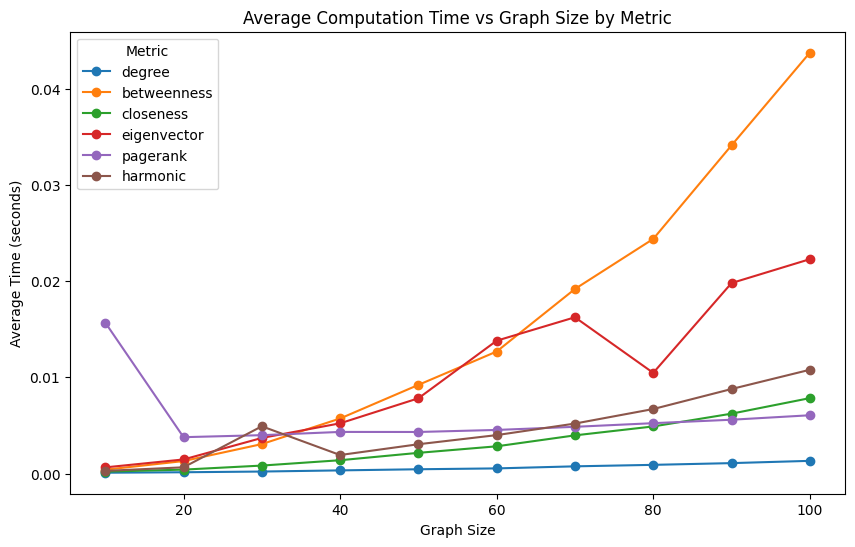

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# group results by size and metric, averaging the times for each graph type
avg_df = df.groupby(["size", "metric"])["time"].mean().reset_index()
metrics = df["metric"].unique()

# iterate over the metrics 
for metric in metrics:
    # subset with a size and an average compute size (for the specific metric)
    subset_with_different_sizes = avg_df[avg_df["metric"] == metric]
    
    # plot on the graph(size x time)
    plt.plot(subset_with_different_sizes["size"], subset_with_different_sizes["time"], marker='o', label=metric)

# plot configurations
plt.title("Average Computation Time vs Graph Size by Metric")
plt.xlabel("Graph Size")
plt.ylabel("Average Time (seconds)")
plt.legend(title="Metric")
plt.show()
